<a href="https://colab.research.google.com/github/anshupandey/xebia_training_data/blob/main/Xebia_CNN_MNIST_Fashion_image_classification_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load the dataset
from tensorflow.keras.datasets import fashion_mnist
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
cnames = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

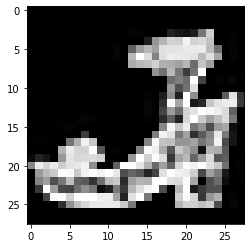

In [4]:
plt.imshow(xtrain[60],cmap='gray')
plt.show()

In [5]:
print(ytrain[60])
print(cnames[ytrain[60]])

5
Sandal


## Data Preprocessing

In [6]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
# shape of image = (28,28) -----> (rows,columns,channel) -----> (28,28,1)
xtrain = xtrain.reshape(60000,28,28,1)
xtest= xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# number of classes = 10
# one hot encode the labels
print(ytrain.shape)
print(ytest.shape)

(60000,)
(10000,)


In [9]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


In [14]:
xtrain = xtrain/255
xtest = xtest/255

# Modelling the CNN - Convolutional Neural Networks

In [15]:
from tensorflow.keras import layers,models

In [44]:
input_layer = layers.Input(shape=(28,28,1))

# Feature Extraction section - convolutional+relu, maxpooling

layer1 = layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu')(input_layer)
layer1 = layers.Conv2D(filters=18,kernel_size=(3,3),activation='relu')(layer1)
layer2 = layers.MaxPooling2D(pool_size=(2,2))(layer1)

layer3 = layers.Conv2D(filters=25,kernel_size=(3,3),activation='relu')(layer2)
layer4 = layers.Conv2D(filters=35,kernel_size=(3,3),activation='relu')(layer3)
layer4 = layers.Conv2D(filters=45,kernel_size=(3,3),activation='relu')(layer4)

layer5 = layers.Flatten()(layer4)

# classification - dense
layer6 = layers.Dense(300,activation='relu')(layer5)
layer6 = layers.Dense(150,activation='relu')(layer6)
layer7 = layers.Dense(100,activation='relu')(layer6)
output_layer = layers.Dense(10,activation='softmax')(layer7)

In [45]:
model = models.Model(inputs=input_layer,outputs = output_layer)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 18)        1638      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 18)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 25)        4075      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 35)          7910      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 6, 6, 45)          1422

In [46]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=20,batch_size=1000,validation_data=(xtest,ytest))

Epoch 1/20
60/60 [==============================] - 2s 27ms/step - loss: 1.5858 - accuracy: 0.4341 - val_loss: 0.7257 - val_accuracy: 0.7212
Epoch 2/20
60/60 [==============================] - 1s 22ms/step - loss: 0.6653 - accuracy: 0.7433 - val_loss: 0.5598 - val_accuracy: 0.7871
Epoch 3/20
60/60 [==============================] - 1s 23ms/step - loss: 0.5247 - accuracy: 0.7970 - val_loss: 0.4794 - val_accuracy: 0.8223
Epoch 4/20
60/60 [==============================] - 1s 23ms/step - loss: 0.4528 - accuracy: 0.8304 - val_loss: 0.4229 - val_accuracy: 0.8475
Epoch 5/20
60/60 [==============================] - 1s 23ms/step - loss: 0.3933 - accuracy: 0.8565 - val_loss: 0.3966 - val_accuracy: 0.8580
Epoch 6/20
60/60 [==============================] - 1s 23ms/step - loss: 0.3683 - accuracy: 0.8657 - val_loss: 0.3723 - val_accuracy: 0.8688
Epoch 7/20
60/60 [==============================] - 1s 22ms/step - loss: 0.3387 - accuracy: 0.8770 - val_loss: 0.3740 - val_accuracy: 0.8637
Epoch 8/20
60

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [32]:
ypred = model.predict(xtest)
ypred = [np.argmax(i) for i in ypred]
ytest2 = [np.argmax(i) for i in ytest]

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ytest2,ypred))

In [ ]:
model.predict(xtest[0].reshape(1,28,28,1))

In [38]:
pd.DataFrame(metrics.confusion_matrix(ytest2,ypred),columns=cnames,index=cnames)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,866,0,21,29,3,2,68,0,11,0
Trouser,0,978,1,15,2,0,3,0,1,0
Pullover,16,1,888,9,38,0,47,0,1,0
Dress,23,3,16,913,16,0,26,0,3,0
Coat,1,1,107,44,771,0,75,0,1,0
Sandal,0,0,0,0,0,987,0,5,0,8
Shirt,147,1,96,25,58,0,661,0,12,0
Sneaker,0,0,0,0,0,33,0,927,1,39
Bag,2,1,4,4,3,3,2,1,979,1
Ankle boot,0,0,0,0,0,8,0,27,1,964
